# Import section

In [14]:
%load_ext autoreload
%autoreload 2

import os
import random
from collections import Counter

import spacy
import nltk
from nltk.corpus import stopwords
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

from context import robot_judge  # Now we can use all the handy robot_judge functionality :-)
from robot_judge.nlp.language_models import spacy_nlp, stop_words

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# How-To

1) In the repo root directory there is a folder called _data_.  
2) Go there and create a folder called *assignment_1* (or whatever the DATA_DIR_NAME variable below is assigned to).   
3) Place all cases files (*1936_X9VD8L.txt*, ...) in there.  
4) Place the *case_reversed.csv* file in there.  
5) Run the code below.  

In [2]:
from robot_judge.io import ProblemSet1Io

In [8]:
N_SAMPLED_CASES = 3
DATA_DIR_NAME = 'assignment_1'

In [9]:
io = ProblemSet1Io(data_dir=DATA_DIR_NAME)
sampled_cases = io.read_multiple_cases_files(n_samples=N_SAMPLED_CASES)

# Task 1
## Compute sentece, words and letters count per document and plot vs year

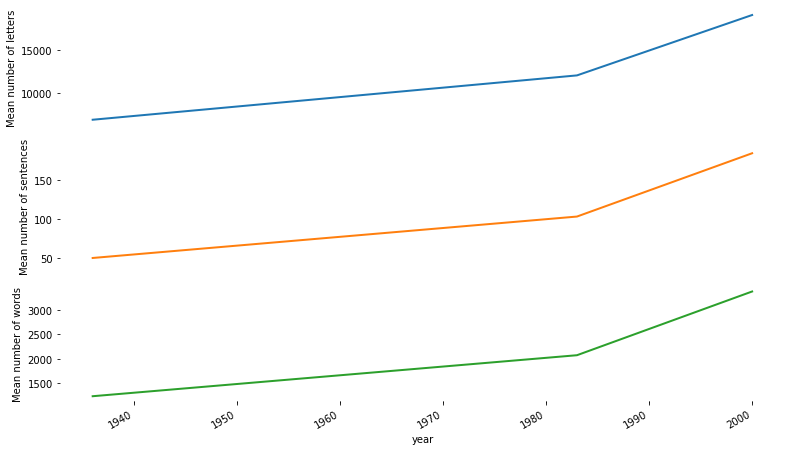

CPU times: user 4.75 s, sys: 901 ms, total: 5.65 s
Wall time: 3.38 s


In [17]:
%%time

from robot_judge.exploration.corpus_analysis import count_words_sents_letters
from robot_judge.exploration.corpus_analysis import visualize_counts
# Takes ~5min for 100 cases.

years, word_counts, sents_counts, letters_counts = count_words_sents_letters(sampled_cases, extract_years=True)
visualize_counts(years, word_counts, sents_counts, letters_counts)

# Task 2
## Plot part-of-speech (POS) tagging frequency vs year

In [ ]:
%%time

years = []
pos_tags = []

for case_title, case_text in cases_dict.items():
    year = get_year_from_case_title(case_title)
    years.append(year)
    
    pos_tags_ = [token.pos_ for token in spacy_doc(case_text)]
    pos_tags.append(pos_tags_)

In [ ]:
def normalize_counter(counter: Counter) -> Counter:
    """Normalizes a counter such that relative frequency is expressed rather than absolute counts."""
    total = sum(counter.values(), 0.0)
    for key in counter:
        counter[key] /= total
    return counter

In [ ]:
sorted_set_years = sorted(set(years))
avg_year_counters = []

for year in sorted_set_years:
    
    pos_counter = Counter()
    n_samples_this_year = 0
    
    for idx, year_orig in enumerate(years):
        if year_orig == year:
            pos_counter += Counter(pos_tags[idx])
            n_samples_this_year += 1
    
    # Normalizing the counter
    pos_counter = normalize_counter(pos_counter)
    
    avg_year_counters.append(pos_counter)
        
pos_df = pd.DataFrame(avg_year_counters, index=sorted_set_years)  

In [ ]:
fig = plt.figure()

ax = pos_df.plot(figsize=(15,8), legend=False)

for line, name in zip(ax.lines, pos_df.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.set_ylabel('Average counts frequency for POS tag')
ax.set_xlabel('Year')


plt.show()

# Task 3 
## Corpus normalization / cleaning & trigram creation

# Task 4
## Create data frame of features

# Task 5
## Create training / test set

# Task 6
## GridsearchCV and ROC / AUC evaluation

# Task 7 
## Vader compound sentiment scores

# Task 8
## tf-idf vectorizer and sentence similarity

# Task 9
## K-means clustering of sentences

# Testing

In [ ]:
test_doc = spacy_doc(read_file('1934_X3ITKT.txt'))

In [ ]:
test_doc = remove_punct_and_sym(test_doc)
test_doc = remove_ws_tokens(test_doc)
test_doc = lemmatize(test_doc)
no_stop = remove_stopwords(test_doc)

In [ ]:
pos_tags_1 = []
for token in test_doc:
    pos_tags_1.append(token.pos_)

In [ ]:
Counter(pos_tags_1)

In [ ]:
Counter(pos_tags) + Counter(pos_tags_1)